In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns 

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin': 
    rc('font', family='AppleGothic')
elif platform.system()=='Windows': 
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("anything")

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 데이터 받아오기 
kr_worktime = pd.read_csv('worktime.csv')
kr_salary = pd.read_csv('salary.csv')
us_worktime = pd.read_csv('us_hours_monthly.csv')
us_salary = pd.read_csv('us_salary_total.csv')
kr_ratio = pd.read_csv('ratio.csv')
kr_worktime
kr_salary
us_salary
us_worktime
us_industry = ['광업 및 벌목업', '건설업', '제조업', '도매업', '소매업', '운수업', '전기, 가스, 증기 및 수도사업', '정보산업', 
            '금융업', '전문, 과학 및 기술 서비스업', '예술, 스포츠 및 여가 관련 서비스업', '기타 산업']
kr_industry = ['전 산업','광업','제조업','전기, 가스, 증기 및 수도사업','하수, 폐기물처리, 원료재생 및 환경복원업','건설업','도매 및 소매업',
               '운수업','숙박 및 음식점업','출판, 영상, 방송통신 및 정보서비스업','금융 및 보험업','부동산업 및 임대업','전문, 과학 및 기술 서비스업',
              '사업시설관리 및 사업지원 서비스업','교육 서비스업','보건업 및 사회복지 서비스업','예술, 스포츠 및 여가 관련 서비스업','협회 및 단체, 수리 및 기타 개인서비스업']

,industry,2017 근로시간,2018 근로시간,2019 근로시간,2020 근로시간,2021 근로시간
0,전 산업,166.3,163.9,163.1,160.6,160.7
1,광업,175.8,176.6,175.7,181.2,179.9
2,제조업,179.8,177.1,175.9,172.7,173.5
3,"전기, 가스, 증기 및 수도사업",164.9,162.1,160.4,163.7,161.6
4,"하수, 폐기물처리, 원료재생 및 환경복원업",177.1,177.8,178.6,176.5,176.9
5,건설업,141.9,138.5,136.3,136.9,135.9
6,도매 및 소매업,167.6,165.2,165.5,163.8,163.8
7,운수업,169.2,166.5,164.3,159.0,160.2
8,숙박 및 음식점업,160.4,159.7,158.6,149.7,148.4
9,"출판, 영상, 방송통신 및 정보서비스업",160.9,161.6,163.9,163.8,164.1


,industry,2017 임금 총액,2018 임금 총액,2019 임금 총액,2020 임금 총액,2021 임금 총액
0,전 산업,3207,3376,3490,3527,3689
1,광업,3713,3835,3977,4325,4415
2,제조업,3690,3930,4017,3990,4239
3,"전기, 가스, 증기 및 수도사업",6281,6436,6502,6733,6753
4,"하수, 폐기물처리, 원료재생 및 환경복원업",3089,3288,3506,3888,4094
5,건설업,2624,2784,2951,3032,3106
6,도매 및 소매업,3049,3214,3372,3423,3551
7,운수업,3156,3357,3476,3530,3795
8,숙박 및 음식점업,1626,1757,1875,1879,1905
9,"출판, 영상, 방송통신 및 정보서비스업",4122,4277,4463,4613,4796


,산업,2017,2018,2019,2020,2021
0,광업 및 벌목업,69455.12,71654.24,74804.52,73657.44,75523.04
1,건설업,54181.52,56235.60,57951.04,59047.60,61454.76
2,제조업,52074.24,53086.40,53911.16,55010.84,57587.80
3,도매업,56043.52,57044.52,58589.28,59764.00,63306.36
4,소매업,26953.64,27889.28,28900.16,30759.12,32365.92
5,운수업,44182.28,45355.92,45669.48,46628.40,49069.36
6,"전기, 가스, 증기 및 수도사업",79516.12,82105.96,84662.64,89158.56,91534.68
7,정보산업,66568.44,69300.80,73562.20,76895.16,79063.96
8,금융업,59704.32,62742.40,64890.36,68377.24,72358.00
9,"전문, 과학 및 기술 서비스업",54709.20,56426.20,58460.32,61318.12,64392.04


,산업,2017,2018,2019,2020,2021
0,광업 및 벌목업,180.733333,183.700000,184.933333,177.433333,180.400000
1,건설업,156.333333,156.800000,157.000000,155.500000,155.766667
2,제조업,163.200000,163.600000,162.166667,159.300000,161.600000
3,도매업,156.200000,156.133333,155.633333,153.866667,156.600000
4,소매업,123.866667,123.900000,122.466667,123.033333,123.333333
5,운수업,154.900000,155.900000,153.933333,153.466667,155.233333
6,"전기, 가스, 증기 및 수도사업",168.833333,168.466667,169.066667,170.800000,169.933333
7,정보산업,144.900000,144.233333,145.300000,146.266667,148.233333
8,금융업,149.833333,150.466667,150.533333,150.566667,150.300000
9,"전문, 과학 및 기술 서비스업",144.200000,144.466667,144.666667,145.533333,146.766667


In [5]:
# index 변경
kr_salary.set_index('industry',inplace=True)
kr_worktime.set_index('industry',inplace=True)
us_salary.set_index('산업',inplace=True)
us_worktime.set_index('산업',inplace=True)
kr_worktime
kr_salary
us_salary
us_worktime

,2017 근로시간,2018 근로시간,2019 근로시간,2020 근로시간,2021 근로시간
industry,,,,,
전 산업,166.3,163.9,163.1,160.6,160.7
광업,175.8,176.6,175.7,181.2,179.9
제조업,179.8,177.1,175.9,172.7,173.5
"전기, 가스, 증기 및 수도사업",164.9,162.1,160.4,163.7,161.6
"하수, 폐기물처리, 원료재생 및 환경복원업",177.1,177.8,178.6,176.5,176.9
건설업,141.9,138.5,136.3,136.9,135.9
도매 및 소매업,167.6,165.2,165.5,163.8,163.8
운수업,169.2,166.5,164.3,159.0,160.2
숙박 및 음식점업,160.4,159.7,158.6,149.7,148.4


,2017 임금 총액,2018 임금 총액,2019 임금 총액,2020 임금 총액,2021 임금 총액
industry,,,,,
전 산업,3207,3376,3490,3527,3689
광업,3713,3835,3977,4325,4415
제조업,3690,3930,4017,3990,4239
"전기, 가스, 증기 및 수도사업",6281,6436,6502,6733,6753
"하수, 폐기물처리, 원료재생 및 환경복원업",3089,3288,3506,3888,4094
건설업,2624,2784,2951,3032,3106
도매 및 소매업,3049,3214,3372,3423,3551
운수업,3156,3357,3476,3530,3795
숙박 및 음식점업,1626,1757,1875,1879,1905


,2017,2018,2019,2020,2021
산업,,,,,
광업 및 벌목업,69455.12,71654.24,74804.52,73657.44,75523.04
건설업,54181.52,56235.60,57951.04,59047.60,61454.76
제조업,52074.24,53086.40,53911.16,55010.84,57587.80
도매업,56043.52,57044.52,58589.28,59764.00,63306.36
소매업,26953.64,27889.28,28900.16,30759.12,32365.92
운수업,44182.28,45355.92,45669.48,46628.40,49069.36
"전기, 가스, 증기 및 수도사업",79516.12,82105.96,84662.64,89158.56,91534.68
정보산업,66568.44,69300.80,73562.20,76895.16,79063.96
금융업,59704.32,62742.40,64890.36,68377.24,72358.00


,2017,2018,2019,2020,2021
산업,,,,,
광업 및 벌목업,180.733333,183.700000,184.933333,177.433333,180.400000
건설업,156.333333,156.800000,157.000000,155.500000,155.766667
제조업,163.200000,163.600000,162.166667,159.300000,161.600000
도매업,156.200000,156.133333,155.633333,153.866667,156.600000
소매업,123.866667,123.900000,122.466667,123.033333,123.333333
운수업,154.900000,155.900000,153.933333,153.466667,155.233333
"전기, 가스, 증기 및 수도사업",168.833333,168.466667,169.066667,170.800000,169.933333
정보산업,144.900000,144.233333,145.300000,146.266667,148.233333
금융업,149.833333,150.466667,150.533333,150.566667,150.300000


In [6]:
# 국내 데이터 시각화 
pd.options.display.float_format = '{:.2f}'.format
sns.set_palette('twilight_shifted_r')
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.rc('font', family='AppleGothic')

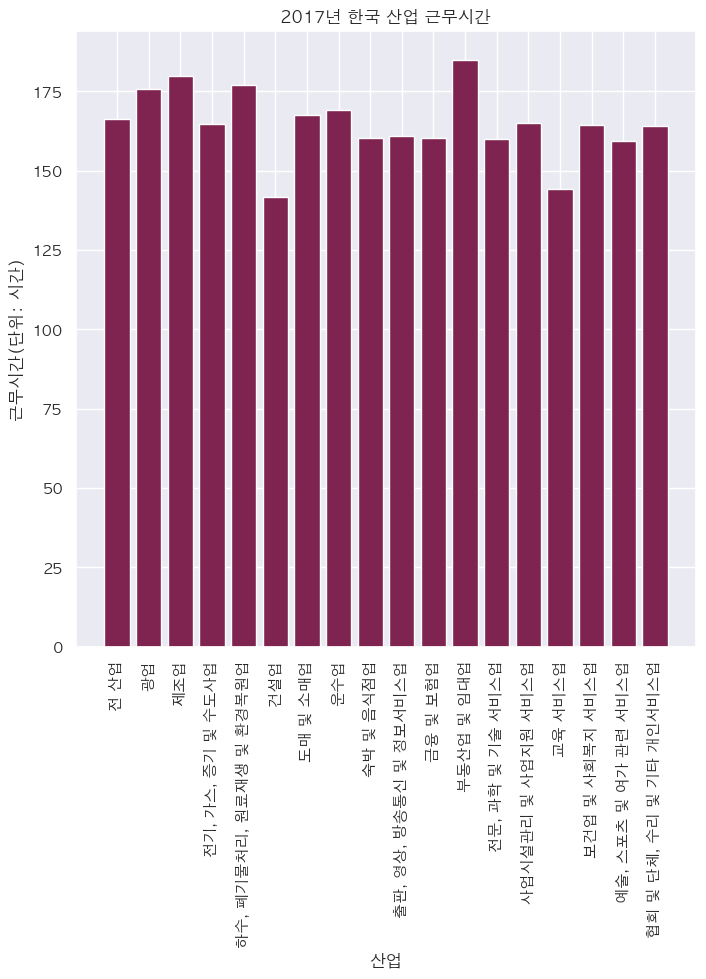

In [7]:
plt.figure(figsize=(8,8))
plt.title('2017년 한국 산업 근무시간')
plt.bar(kr_industry, kr_worktime['2017 근로시간'])
plt.xlabel('산업')
plt.ylabel('근무시간(단위: 시간)')
plt.xticks(rotation=90)
plt.show();

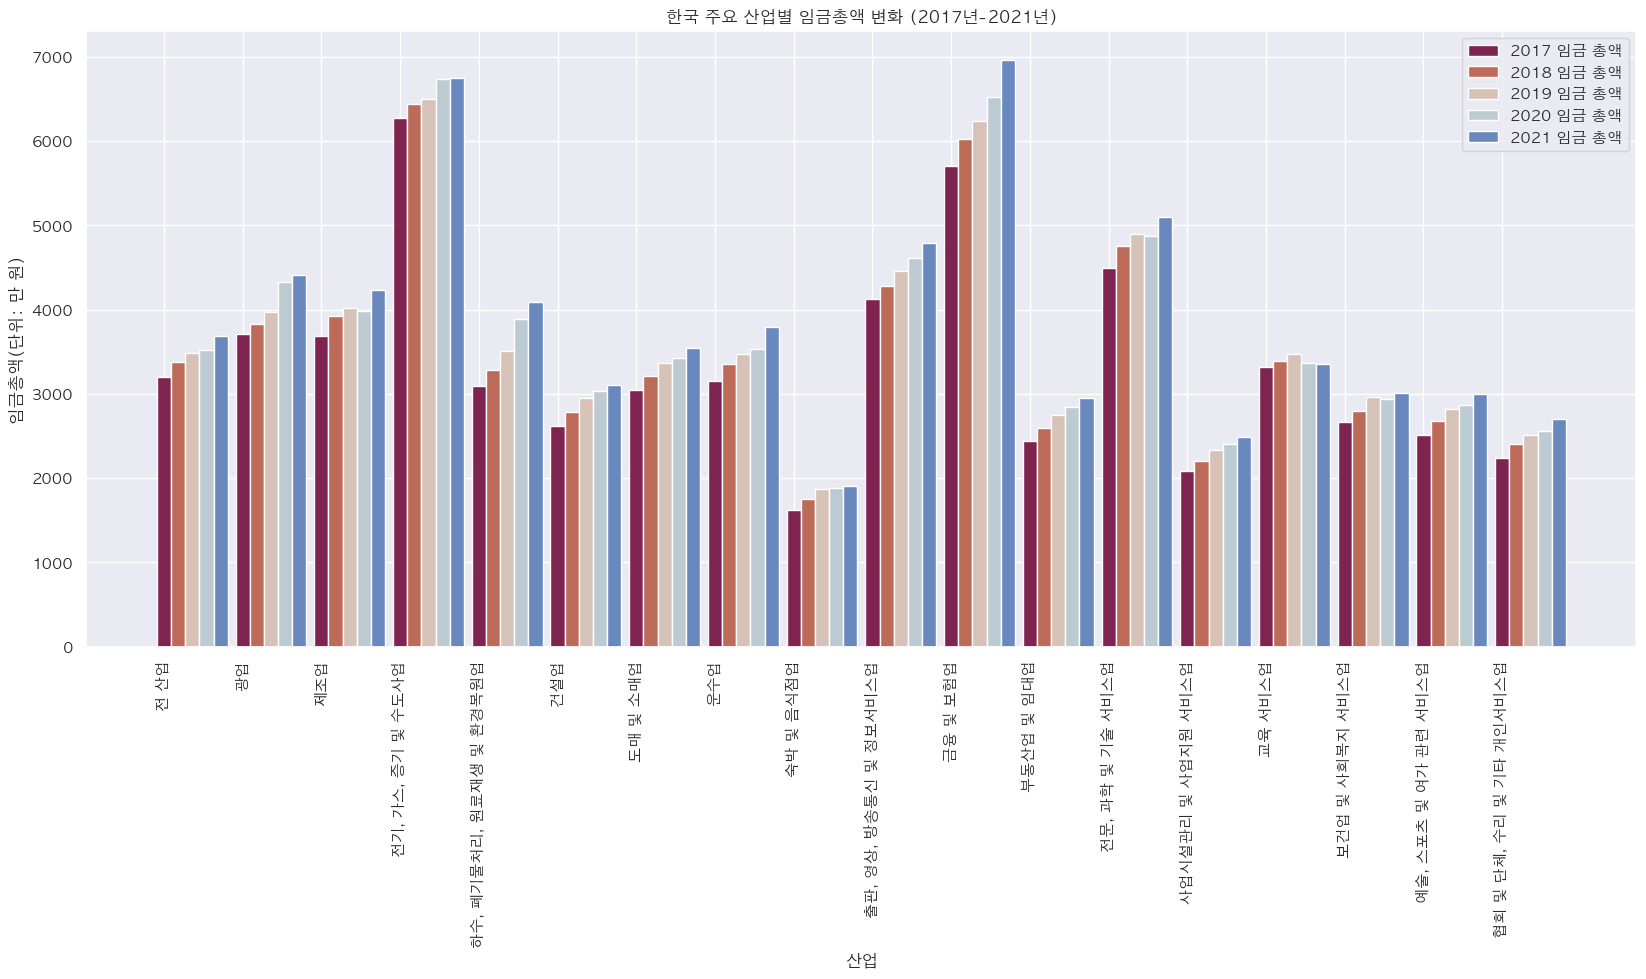

In [8]:
plt.figure(figsize=(20,8))
bar_width = 0.18
index = np.arange(18)

plt.title('한국 주요 산업별 임금총액 변화 (2017년-2021년)')
plt.bar(index, kr_salary['2017 임금 총액'], bar_width)
plt.bar(index+bar_width, kr_salary['2018 임금 총액'], bar_width)
plt.bar(index+bar_width*2, kr_salary['2019 임금 총액'], bar_width)
plt.bar(index+bar_width*3, kr_salary['2020 임금 총액'], bar_width)
plt.bar(index+bar_width*4, kr_salary['2021 임금 총액'], bar_width)
plt.xticks(index, kr_industry, rotation=90)
plt.legend(('2017 임금 총액','2018 임금 총액','2019 임금 총액','2020 임금 총액','2021 임금 총액'))
plt.xlabel('산업')
plt.ylabel('임금총액(단위: 만 원)')
plt.show();

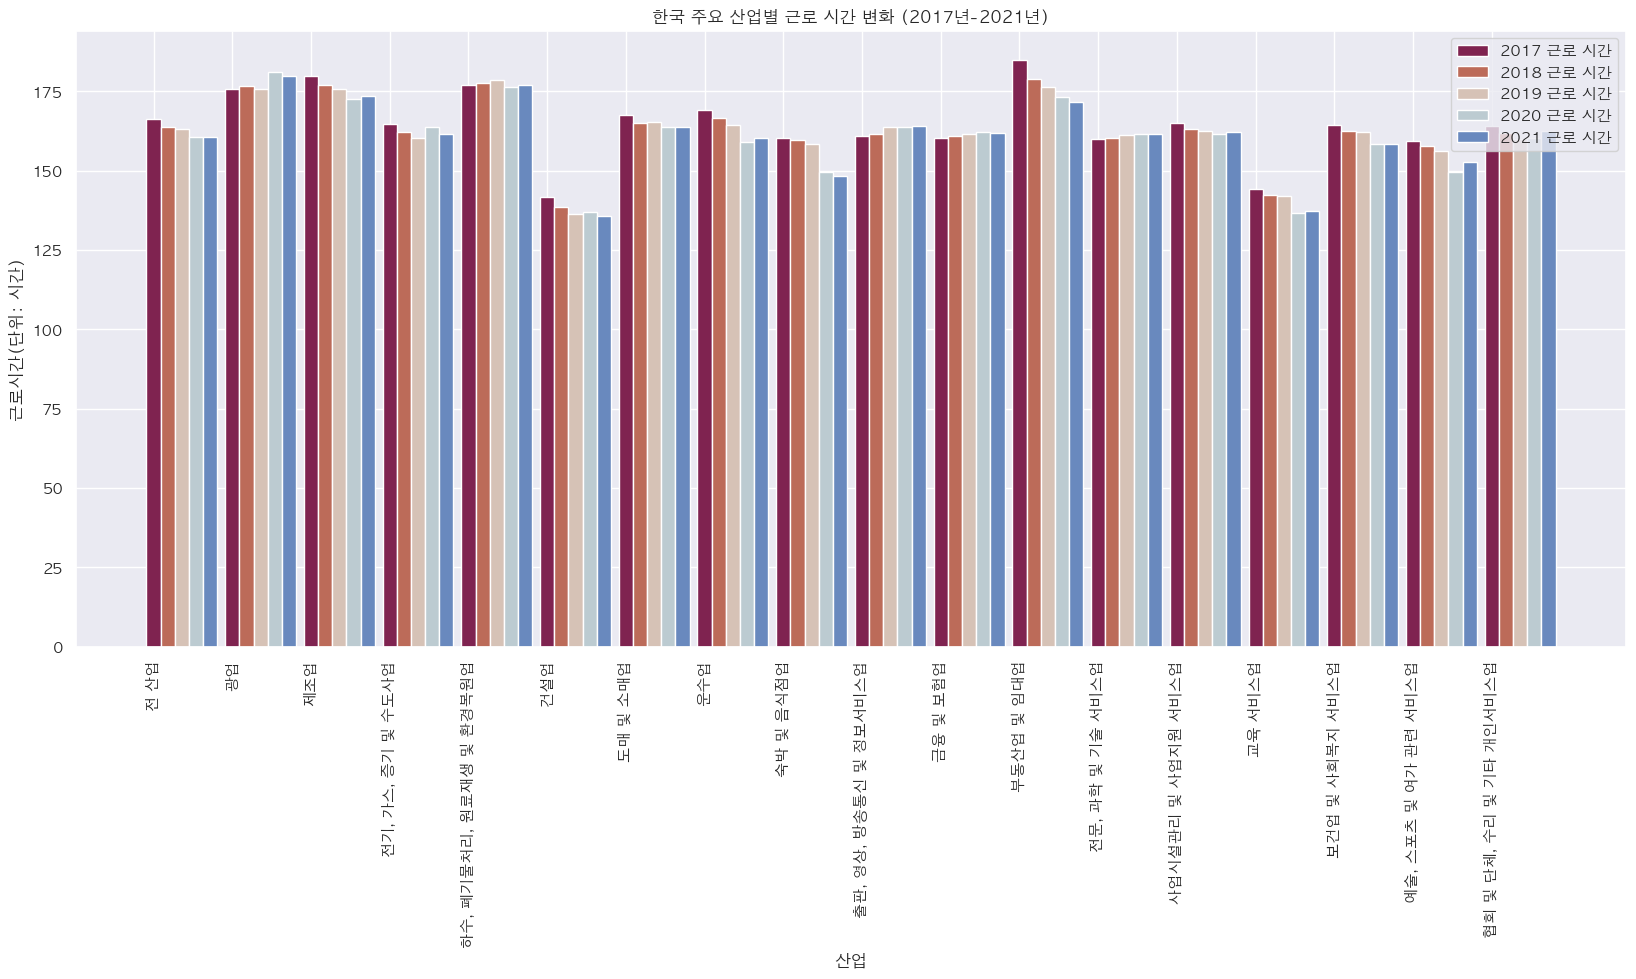

In [9]:
plt.figure(figsize=(20,8))
bar_width = 0.18
index = np.arange(18)

plt.title('한국 주요 산업별 근로 시간 변화 (2017년-2021년)')
plt.bar(index, kr_worktime['2017 근로시간'], bar_width)
plt.bar(index+bar_width, kr_worktime['2018 근로시간'], bar_width)
plt.bar(index+bar_width*2, kr_worktime['2019 근로시간'], bar_width)
plt.bar(index+bar_width*3, kr_worktime['2020 근로시간'], bar_width)
plt.bar(index+bar_width*4, kr_worktime['2021 근로시간'], bar_width)
plt.xticks(index, kr_industry, rotation=90)
plt.legend(('2017 근로 시간','2018 근로 시간','2019 근로 시간','2020 근로 시간','2021 근로 시간'))
plt.xlabel('산업')
plt.ylabel('근로시간(단위: 시간)')
plt.show();

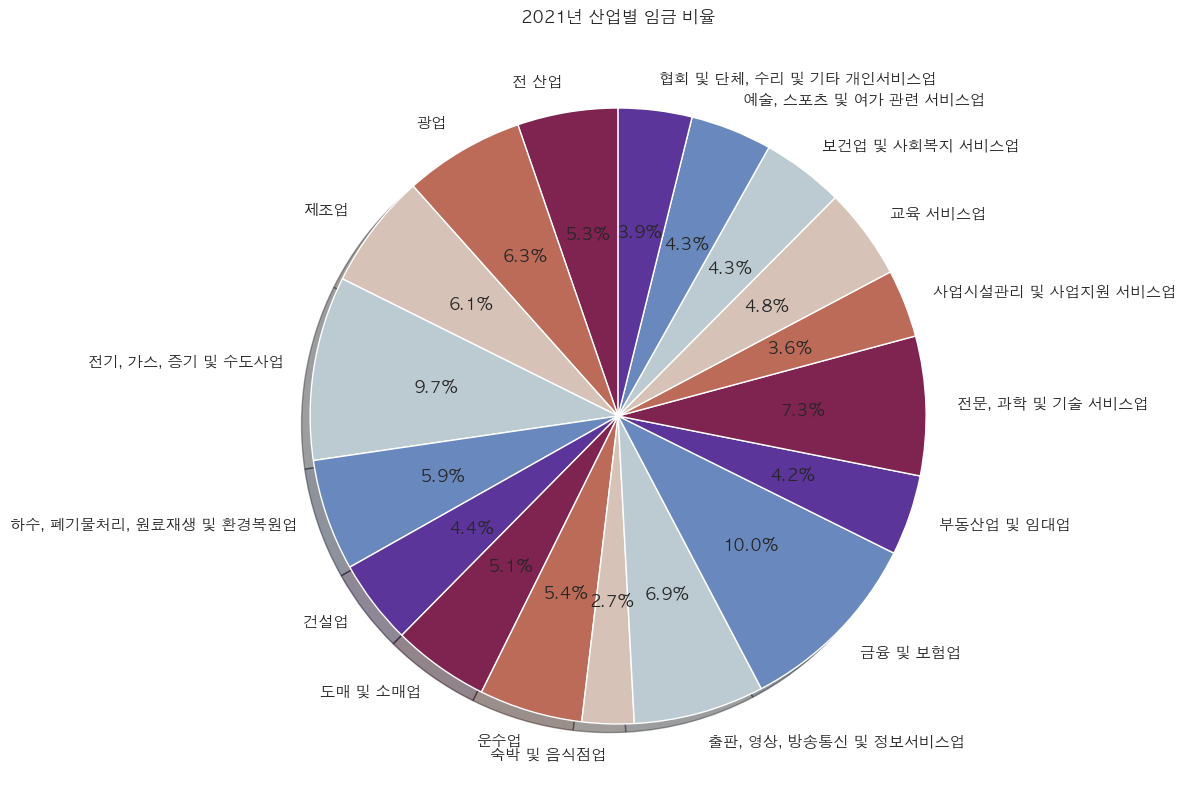

In [10]:
labels=kr_industry
size=kr_salary['2021 임금 총액']
explode=(0,0.4,0,0.5)

plt.figure(figsize=(10,10))
plt.title('2021년 산업별 임금 비율')
plt.pie(size, labels=labels,autopct='%1.1f%%',shadow=True,startangle=90);

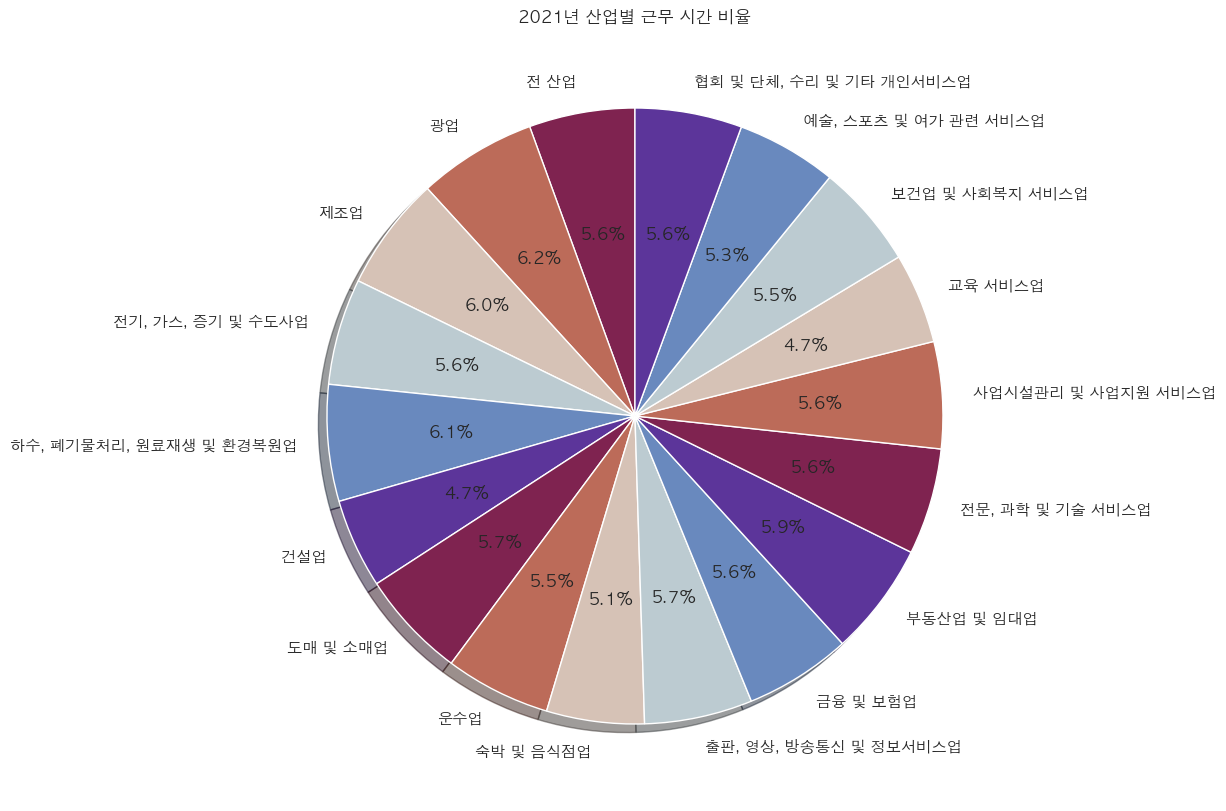

In [11]:
labels=kr_industry
size=kr_worktime['2021 근로시간']
explode=(0,0.4,0,0.5)

plt.figure(figsize=(10,10))
plt.title('2021년 산업별 근무 시간 비율')
plt.pie(size, labels=labels,autopct='%1.1f%%',shadow=True,startangle=90);

In [12]:
# 근무시간 대비 임금 비율 한국
kr_ratio.set_index('industry',inplace=True)
kr_ratio

,17_ratio,18_ratio,19_ratio,20_ratio,21_ratio
industry,,,,,
전 산업,19.28,20.60,21.40,21.96,22.96
광업,21.12,21.72,22.64,23.87,24.54
제조업,20.52,22.19,22.84,23.10,24.43
"전기, 가스, 증기 및 수도사업",38.09,39.70,40.54,41.13,41.79
"하수, 폐기물처리, 원료재생 및 환경복원업",17.44,18.49,19.63,22.03,23.14
건설업,18.49,20.10,21.65,22.15,22.86
도매 및 소매업,18.19,19.46,20.37,20.90,21.68
운수업,18.65,20.16,21.16,22.20,23.69
숙박 및 음식점업,10.14,11.00,11.82,12.55,12.84


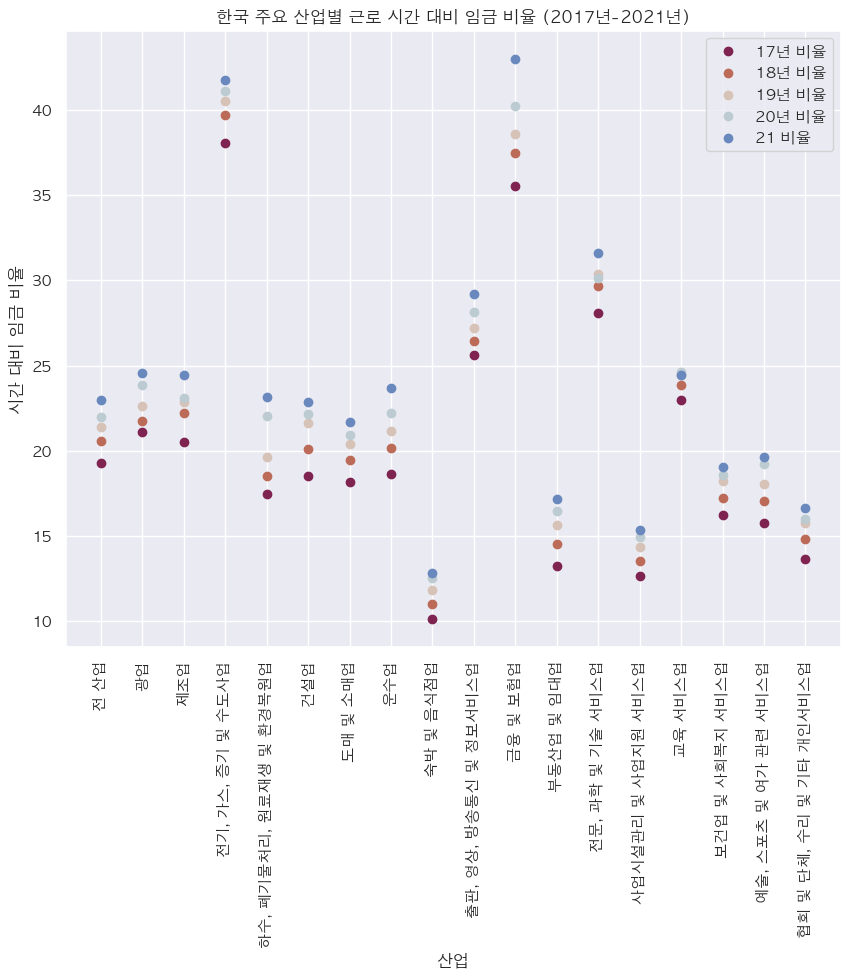

In [13]:
plt.figure(figsize=(10,8))
bar_width = 0.18
index = np.arange(18)

plt.title('한국 주요 산업별 근로 시간 대비 임금 비율 (2017년-2021년)')
plt.scatter( index,kr_ratio['17_ratio'])
plt.scatter( index,kr_ratio['18_ratio'])
plt.scatter( index,kr_ratio['19_ratio'])
plt.scatter( index,kr_ratio['20_ratio'])
plt.scatter( index,kr_ratio['21_ratio'])

plt.legend(('17년 비율','18년 비율','19년 비율','20년 비율','21 비율'))

plt.xticks(index, kr_industry, rotation=90)
plt.xlabel('산업')
plt.ylabel('시간 대비 임금 비율')
plt.show();

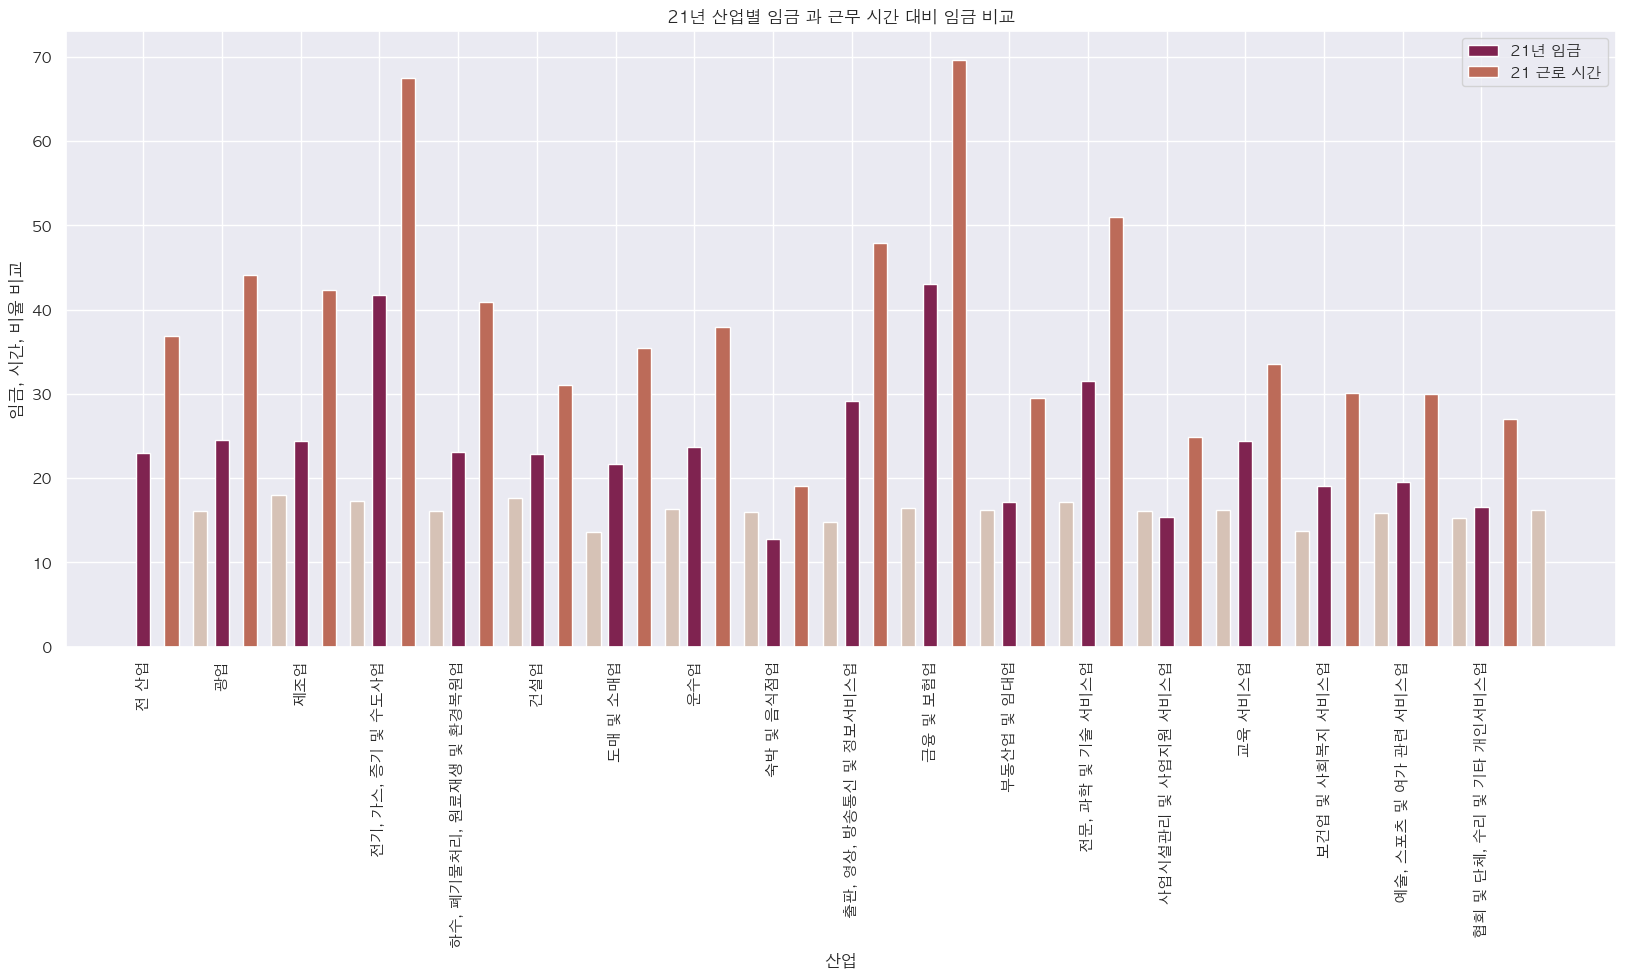

In [14]:
plt.figure(figsize=(20,8))
bar_width = 0.18
index = np.arange(18)

plt.title('21년 산업별 임금 과 근무 시간 대비 임금 비교')
plt.bar(index, kr_ratio['21_ratio'], bar_width)
plt.bar(index+bar_width*2, kr_salary['2021 임금 총액']/100, bar_width)
plt.bar(index+bar_width*4, kr_worktime['2021 근로시간']/10, bar_width)
plt.xticks(index, kr_industry, rotation=90)
plt.legend(('21년 임금 ','21 근로 시간'))
plt.xlabel('산업')
plt.ylabel('임금, 시간, 비율 비교')
plt.show();

In [15]:
# 미국 한국 비교 데이터 전처리 
# 소득 비교

kr_salary
us_salary

,2017 임금 총액,2018 임금 총액,2019 임금 총액,2020 임금 총액,2021 임금 총액
industry,,,,,
전 산업,3207,3376,3490,3527,3689
광업,3713,3835,3977,4325,4415
제조업,3690,3930,4017,3990,4239
"전기, 가스, 증기 및 수도사업",6281,6436,6502,6733,6753
"하수, 폐기물처리, 원료재생 및 환경복원업",3089,3288,3506,3888,4094
건설업,2624,2784,2951,3032,3106
도매 및 소매업,3049,3214,3372,3423,3551
운수업,3156,3357,3476,3530,3795
숙박 및 음식점업,1626,1757,1875,1879,1905


,2017,2018,2019,2020,2021
산업,,,,,
광업 및 벌목업,69455.12,71654.24,74804.52,73657.44,75523.04
건설업,54181.52,56235.60,57951.04,59047.60,61454.76
제조업,52074.24,53086.40,53911.16,55010.84,57587.80
도매업,56043.52,57044.52,58589.28,59764.00,63306.36
소매업,26953.64,27889.28,28900.16,30759.12,32365.92
운수업,44182.28,45355.92,45669.48,46628.40,49069.36
"전기, 가스, 증기 및 수도사업",79516.12,82105.96,84662.64,89158.56,91534.68
정보산업,66568.44,69300.80,73562.20,76895.16,79063.96
금융업,59704.32,62742.40,64890.36,68377.24,72358.00


In [16]:
us_salary.loc['도매 및 소매업']=us_salary.loc['도매업'] + us_salary.loc['소매업']

In [17]:
us_salary = us_salary.drop(index=['도매업','소매업','기타 산업'])
us_salary = us_salary.rename(index={'광업 및 벌목업': '광업'})

In [18]:
same_index = ['광업', '건설업', '제조업', '도매 및 소매업','운수업', '전기, 가스, 증기 및 수도사업', '정보산업', '금융업', '전문, 과학 및 기술 서비스업',
'예술, 스포츠 및 여가 관련 서비스업']
us_salary=us_salary.reindex(same_index)

In [19]:
us_salary

,2017,2018,2019,2020,2021
산업,,,,,
광업,69455.12,71654.24,74804.52,73657.44,75523.04
건설업,54181.52,56235.60,57951.04,59047.60,61454.76
제조업,52074.24,53086.40,53911.16,55010.84,57587.80
도매 및 소매업,82997.16,84933.80,87489.44,90523.12,95672.28
운수업,44182.28,45355.92,45669.48,46628.40,49069.36
"전기, 가스, 증기 및 수도사업",79516.12,82105.96,84662.64,89158.56,91534.68
정보산업,66568.44,69300.80,73562.20,76895.16,79063.96
금융업,59704.32,62742.40,64890.36,68377.24,72358.00
"전문, 과학 및 기술 서비스업",54709.20,56426.20,58460.32,61318.12,64392.04


In [20]:
kr_sal=pd.read_csv('kr_salary.csv', encoding='utf-8-sig')
kr_sal=kr_sal.set_index('industry')
kr_sal.index=same_index
kr_sal

,2017 임금 총액,2018 임금 총액,2019 임금 총액,2020 임금 총액,2021 임금 총액
광업,3713,3835,3977,4325,4415
건설업,2624,2784,2951,3032,3106
제조업,3690,3930,4017,3990,4239
도매 및 소매업,3156,3357,3476,3530,3795
운수업,6281,6436,6502,6733,6753
"전기, 가스, 증기 및 수도사업",4122,4277,4463,4613,4796
정보산업,5706,6026,6236,6526,6963
금융업,4492,4757,4901,4871,5106
"전문, 과학 및 기술 서비스업",2512,2684,2819,2873,2994
"예술, 스포츠 및 여가 관련 서비스업",3049,3214,3372,3423,3551


In [21]:
# 달러 치환 & 월 단위 -> 연봉으로 변경
kr_sal=kr_sal*12*1000*0.00079

In [22]:
kr_sal

,2017 임금 총액,2018 임금 총액,2019 임금 총액,2020 임금 총액,2021 임금 총액
광업,35199.24,36355.80,37701.96,41001.00,41854.20
건설업,24875.52,26392.32,27975.48,28743.36,29444.88
제조업,34981.20,37256.40,38081.16,37825.20,40185.72
도매 및 소매업,29918.88,31824.36,32952.48,33464.40,35976.60
운수업,59543.88,61013.28,61638.96,63828.84,64018.44
"전기, 가스, 증기 및 수도사업",39076.56,40545.96,42309.24,43731.24,45466.08
정보산업,54092.88,57126.48,59117.28,61866.48,66009.24
금융업,42584.16,45096.36,46461.48,46177.08,48404.88
"전문, 과학 및 기술 서비스업",23813.76,25444.32,26724.12,27236.04,28383.12
"예술, 스포츠 및 여가 관련 서비스업",28904.52,30468.72,31966.56,32450.04,33663.48


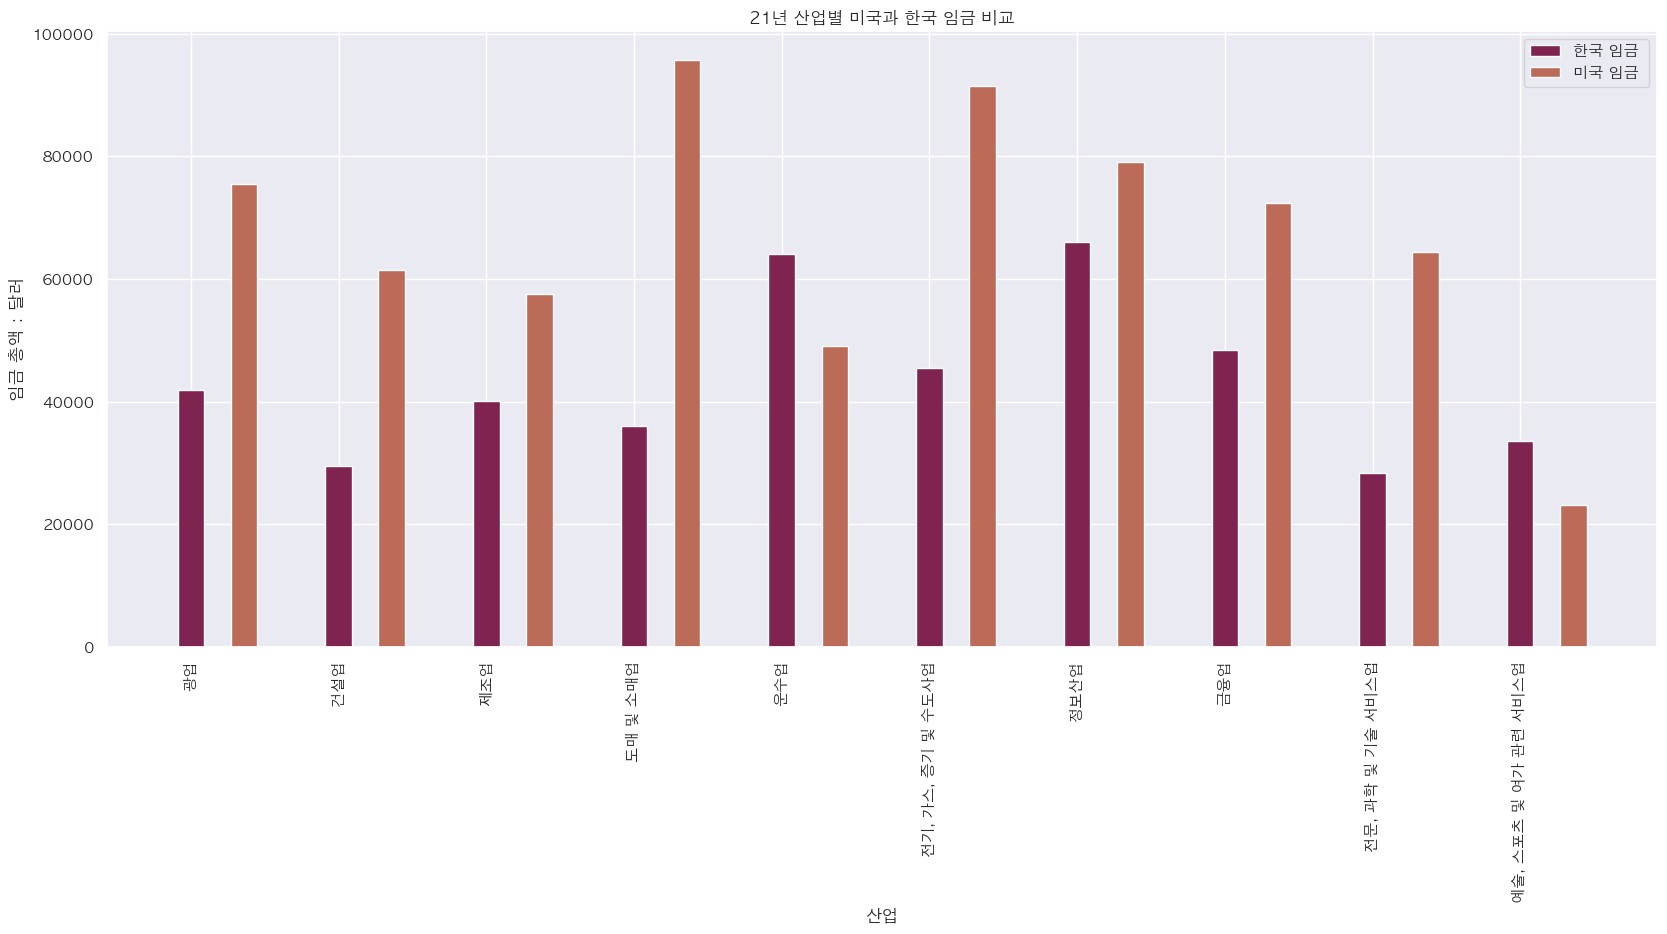

In [23]:
plt.figure(figsize=(20,8))
bar_width = 0.18
index = np.arange(10)

plt.title('21년 산업별 미국과 한국 임금 비교')
plt.bar(index, kr_sal['2021 임금 총액'], bar_width)
plt.bar(index+bar_width*2, us_salary['2021'], bar_width)
plt.xticks(index, same_index, rotation=90)
plt.legend(('한국 임금 ','미국 임금'))

plt.xlabel('산업')
plt.ylabel('임금 총액 : 달러')
plt.show();

In [24]:
us_worktime.loc['도매 및 소매업']=us_worktime.loc['도매업'] + us_worktime.loc['소매업']
us_worktime = us_worktime.drop(index=['도매업','소매업','기타 산업'])
us_worktime = us_worktime.rename(index={'광업 및 벌목업': '광업'})
same_index = ['광업', '건설업', '제조업', '도매 및 소매업','운수업', '전기, 가스, 증기 및 수도사업', '정보산업', '금융업', '전문, 과학 및 기술 서비스업',
'예술, 스포츠 및 여가 관련 서비스업']
us_worktime=us_worktime.reindex(same_index)
us_worktime

,2017,2018,2019,2020,2021
산업,,,,,
광업,180.73,183.70,184.93,177.43,180.40
건설업,156.33,156.80,157.00,155.50,155.77
제조업,163.20,163.60,162.17,159.30,161.60
도매 및 소매업,280.07,280.03,278.10,276.90,279.93
운수업,154.90,155.90,153.93,153.47,155.23
"전기, 가스, 증기 및 수도사업",168.83,168.47,169.07,170.80,169.93
정보산업,144.90,144.23,145.30,146.27,148.23
금융업,149.83,150.47,150.53,150.57,150.30
"전문, 과학 및 기술 서비스업",144.20,144.47,144.67,145.53,146.77


In [25]:
kr_wt=pd.read_csv('kr_노동시간.csv', encoding='utf-8-sig')
kr_wt

,industry,2017 근로시간,2018 근로시간,2019 근로시간,2020 근로시간,2021 근로시간
0,광업,175.80,176.60,175.70,181.20,179.90
1,건설업,141.90,138.50,136.30,136.90,135.90
2,제조업,179.80,177.10,175.90,172.70,173.50
3,운수업,169.20,166.50,164.30,159.00,160.20
4,"전기, 가스, 증기 및 수도사업",164.90,162.10,160.40,163.70,161.60
5,정보산업,160.90,161.60,163.90,163.80,164.10
6,금융업,160.50,160.90,161.50,162.10,161.90
7,"전문, 과학 및 기술 서비스업",160.10,160.40,161.40,161.70,161.60
8,"예술, 스포츠 및 여가 관련 서비스업",159.50,157.70,156.10,149.70,152.70
9,도매 및 소매업,167.60,165.20,165.50,163.80,163.80


In [26]:
kr_wt=kr_wt.set_index('industry')
kr_wt.index=same_index
kr_wt

,2017 근로시간,2018 근로시간,2019 근로시간,2020 근로시간,2021 근로시간
광업,175.80,176.60,175.70,181.20,179.90
건설업,141.90,138.50,136.30,136.90,135.90
제조업,179.80,177.10,175.90,172.70,173.50
도매 및 소매업,169.20,166.50,164.30,159.00,160.20
운수업,164.90,162.10,160.40,163.70,161.60
"전기, 가스, 증기 및 수도사업",160.90,161.60,163.90,163.80,164.10
정보산업,160.50,160.90,161.50,162.10,161.90
금융업,160.10,160.40,161.40,161.70,161.60
"전문, 과학 및 기술 서비스업",159.50,157.70,156.10,149.70,152.70
"예술, 스포츠 및 여가 관련 서비스업",167.60,165.20,165.50,163.80,163.80


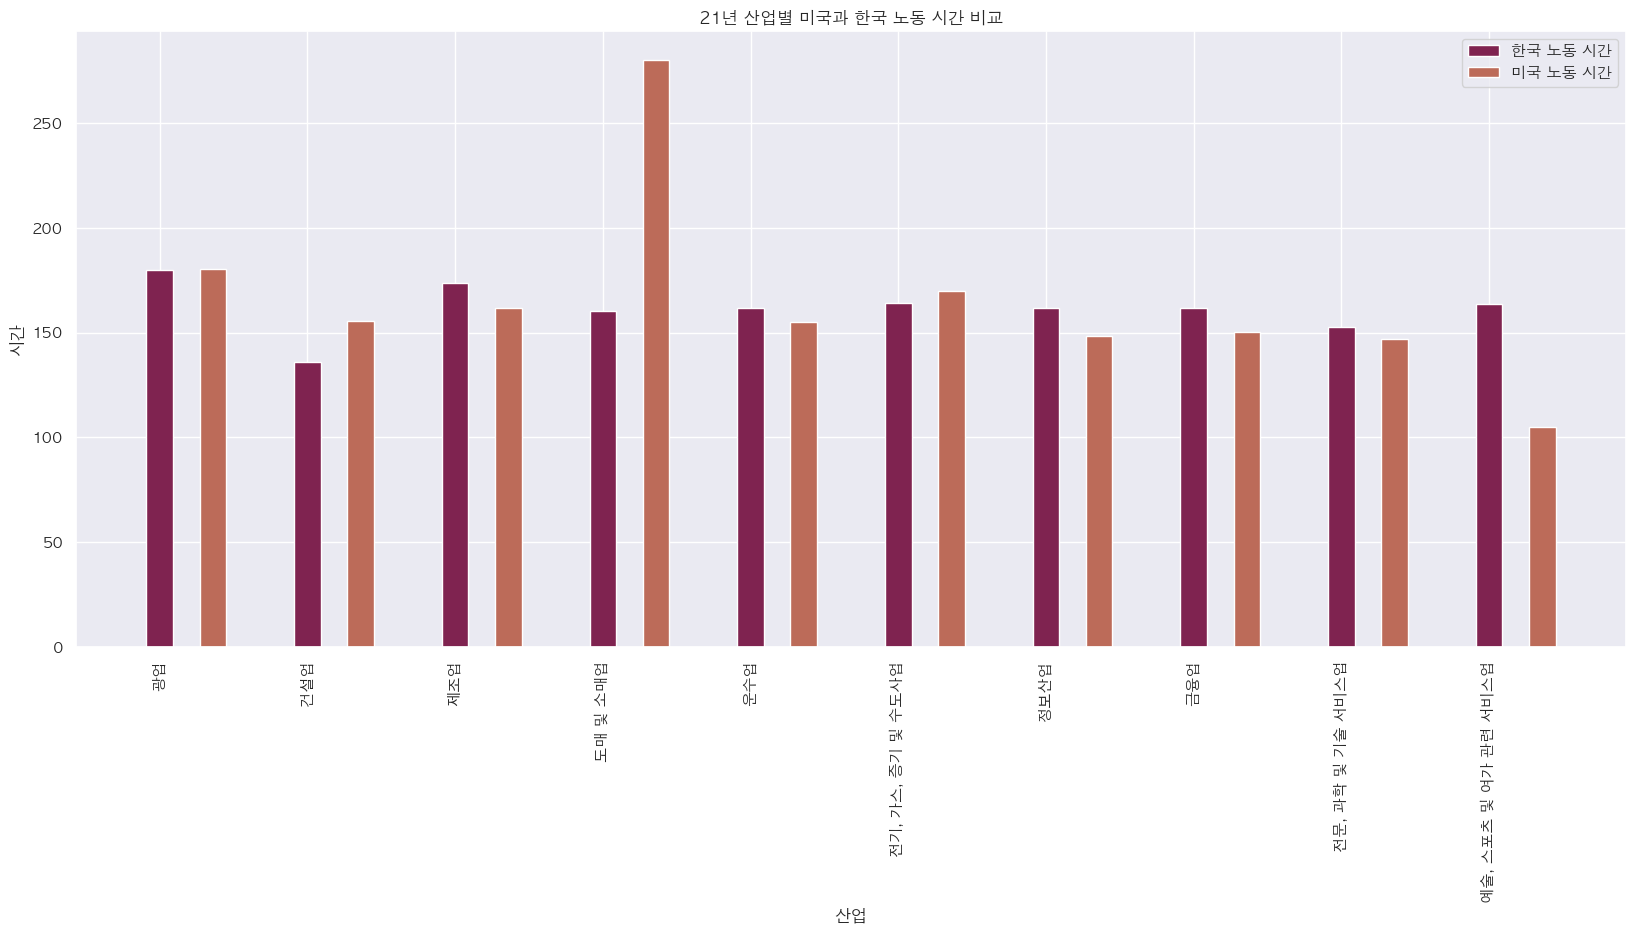

In [27]:
plt.figure(figsize=(20,8))
bar_width = 0.18
index = np.arange(10)

plt.title('21년 산업별 미국과 한국 노동 시간 비교')
plt.bar(index, kr_wt['2021 근로시간'], bar_width)
plt.bar(index+bar_width*2, us_worktime['2021'], bar_width)
plt.xticks(index, same_index, rotation=90)
plt.xlabel('산업')
plt.ylabel('시간')
plt.legend(('한국 노동 시간','미국 노동 시간'))

plt.show();